## Objective
To predict the concrete strength using the data available in file concrete_data.xls. 
Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
Name -- Data Type -- Measurement -- Description
 Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
 Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
 Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
 Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
 Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
 Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
 Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
 Age(age) -- quantitative -- Day (1~365) -- Input Variable
 Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn import model_selection

In [4]:
df = pd.read_csv("concrete.csv")
df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [5]:
df.shape

(1030, 9)

In [6]:
df.size

9270

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

## Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes
which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates (10 Marks)
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

1. Univariate Analysis

In [9]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
df.describe(include = 'all').T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [11]:
#Range
df.max() - df.min()

cement          438.00
slag            359.40
ash             200.10
water           125.20
superplastic     32.20
coarseagg       344.00
fineagg         398.60
age             364.00
strength         80.27
dtype: float64

In [12]:
#IQR
df.quantile(0.75) - df.quantile(0.25)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64

In [13]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

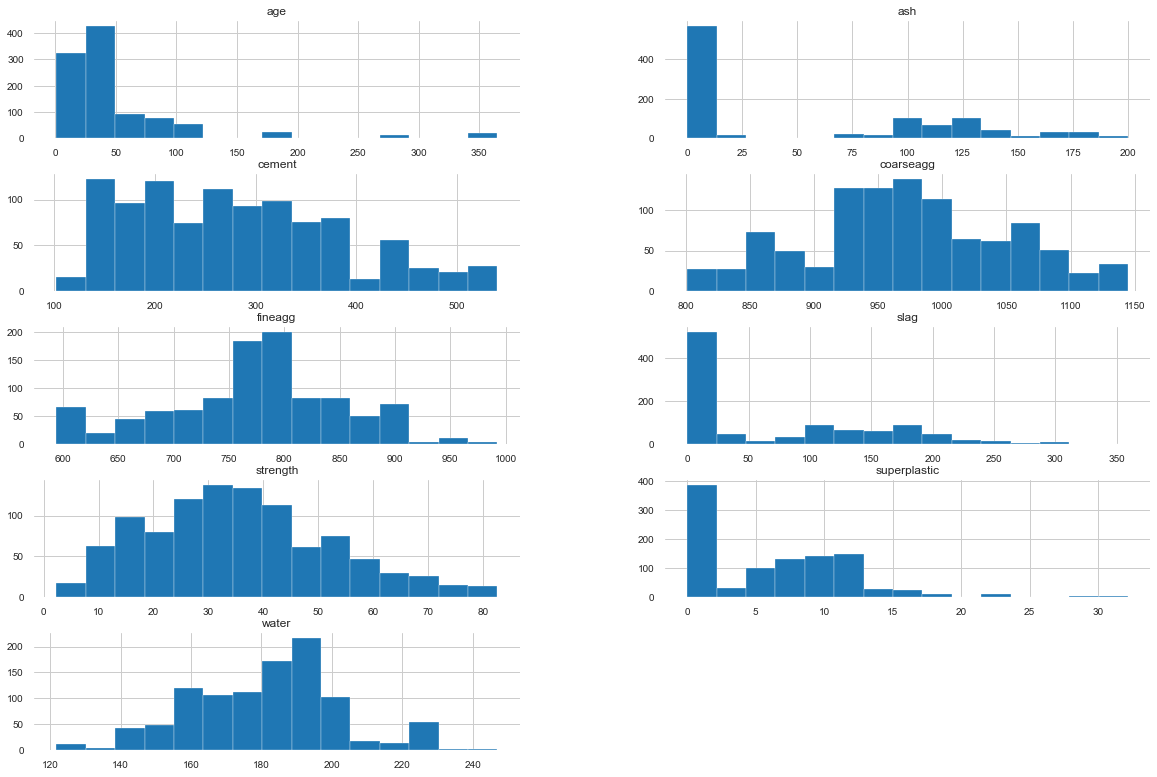

In [14]:
columns = list(df)
df[columns].hist(stacked=True, bins=15, figsize=(20,50), layout=(18,2));

In [15]:
df.skew() 

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [16]:
df.isnull().any().any()

False

<Figure size 1440x720 with 0 Axes>

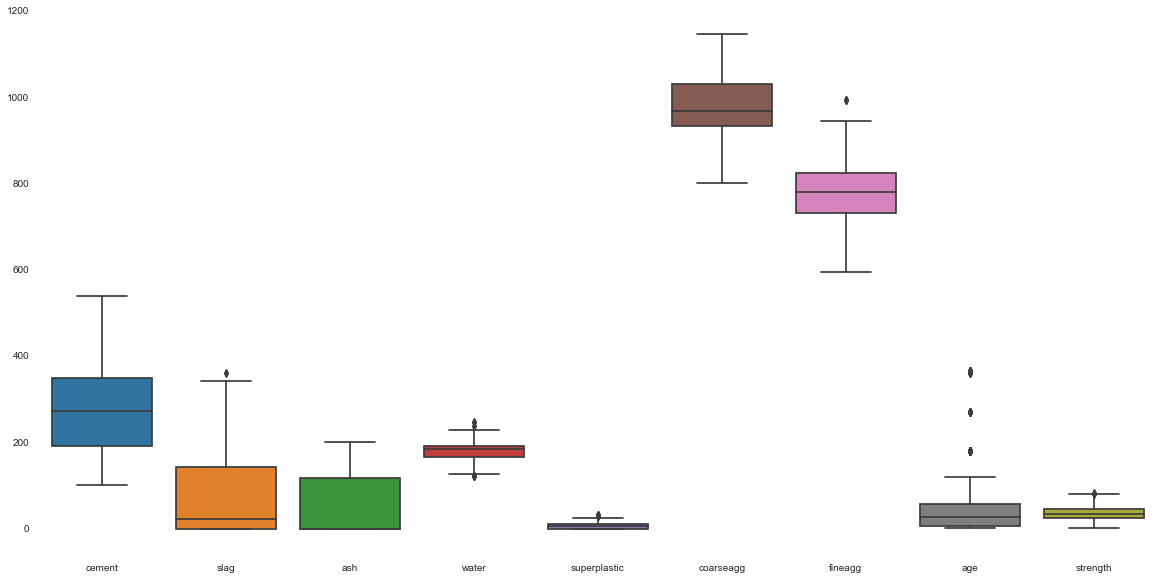

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

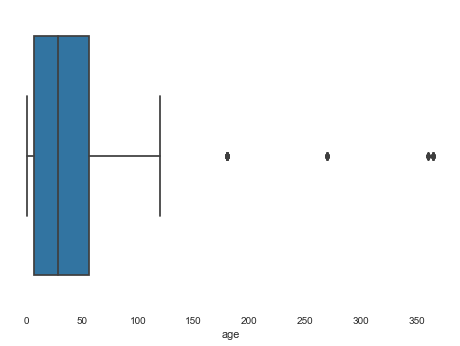

In [18]:
sns.boxplot(df['age'])

In [19]:
df = df[df['age'] <= 365]
df.shape

(1030, 9)

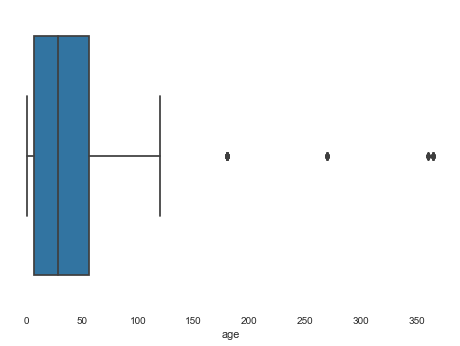

In [20]:
sns.boxplot(df['age'])

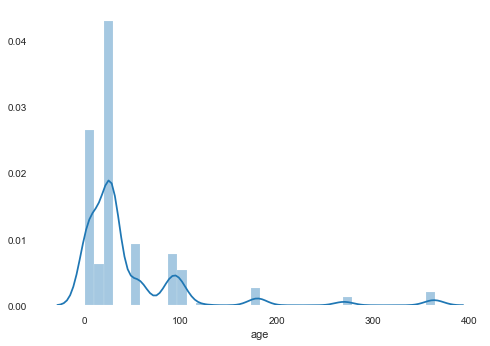

In [21]:
sns.distplot(df.age)

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [23]:
np.where((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

(array([  44,   51,   64,   66,   93,   99,  103,  129,  133,  144,  149,
         152,  156,  157,  159,  192,  198,  199,  207,  232,  256,  262,
         263,  270,  292,  297,  302,  312,  313,  323,  359,  361,  370,
         393,  432,  447,  448,  462,  465,  484,  504,  538,  539,  570,
         581,  584,  587,  594,  601,  620,  622,  623,  632,  642,  696,
         713,  720,  721,  732,  740,  744,  754,  755,  776,  789,  816,
         826,  838,  850,  857,  861,  878,  900,  901,  914,  918,  919,
         950,  951,  955,  957,  971,  985,  990,  995, 1003, 1017, 1026,
        1028]),
 array([4, 7, 7, 3, 7, 7, 7, 6, 7, 7, 7, 7, 4, 7, 7, 8, 7, 7, 7, 4, 7, 7,
        3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 7, 3, 7, 7, 6, 4, 7, 7,
        7, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 3, 4, 7, 7, 7, 3, 4,
        3, 4, 7, 6, 7, 7, 7, 7, 3, 1, 7, 8, 7, 4, 7, 7, 7, 1, 7, 8, 7, 4,
        7]))

In [24]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df < Q1 - 1.5 * IQR)[0], np.where(df < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df > Q3 + 1.5 * IQR)[0], np.where(df > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df.iloc[i,j] = whisker[j]

<Figure size 1440x720 with 0 Axes>

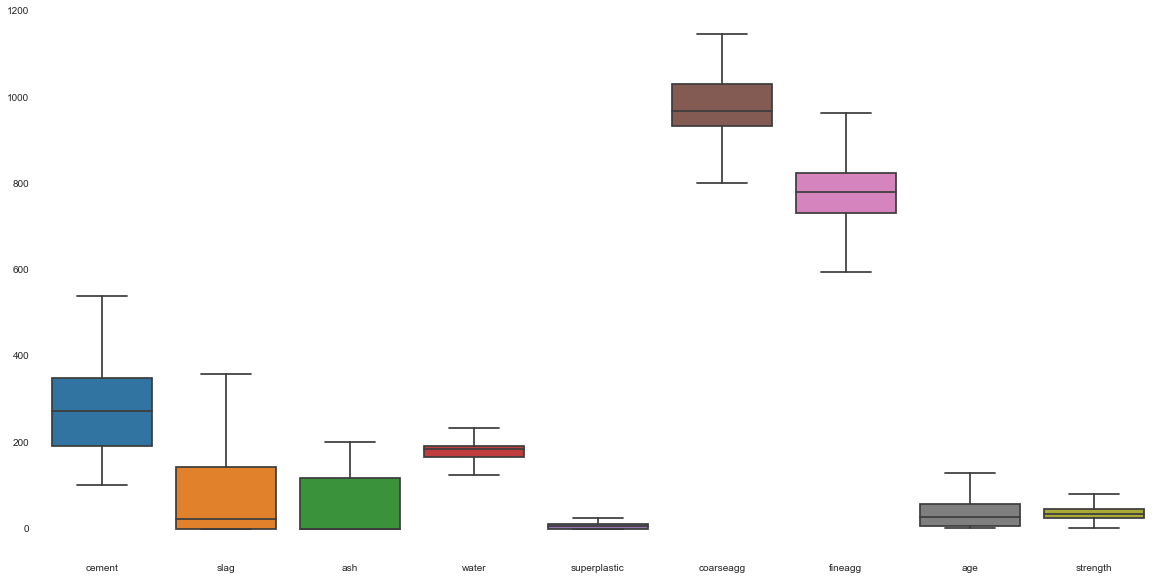

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [26]:
dupes = df.duplicated()
sum(dupes)

25

In [27]:
df =df.drop_duplicates()

In [28]:
df.shape

(1005, 9)

### Summary:
From the Pandas profiling report & analysis done above we observe that:
There are total 9 variables and 1030 records. All the variables are numerical. There are no missing values in the data. 
However do we have some outliers which we need to address. Please refer below observations from data.

The mean amount of cement is 281 kg/m3 , slag is 73 kg/m3, ash 54 kg/m3, water is 181 kg/m3, Super plastic 6 kg/m3, Course aggregates 972kg/m3, fine aggregates is 773 kg/m3.

The average age of the concrete is 45 days. Median is 28 days. The outliers have been treated. 

Depending upon the quantity mixture the average strength of the concrete is 35 Mpa, Minimum in the data set is 2 Mpa & max goes till 82.6 Mpa.

2. Bi-variate Analysis

In [29]:
df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.303354 -0.385610 -0.056526      0.046528  -0.086205   
slag         -0.303354  1.000000 -0.312360  0.130155      0.019381  -0.277582   
ash          -0.385610 -0.312360  1.000000 -0.284879      0.434163  -0.026468   
water        -0.056526  0.130155 -0.284879  1.000000     -0.654684  -0.210537   
superplastic  0.046528  0.019381  0.434163 -0.654684      1.000000  -0.236395   
coarseagg    -0.086205 -0.277582 -0.026468 -0.210537     -0.236395   1.000000   
fineagg      -0.248182 -0.291465  0.092243 -0.443099      0.201508  -0.160090   
age           0.055649 -0.054645 -0.094626  0.194061     -0.127187   0.012784   
strength      0.488469  0.103116 -0.080435 -0.270875      0.343296  -0.145030   

               fineagg       age  strength  
cement       -0.248182  0.055649  0.488469  
slag         -0.291465 -0.054645  0.103116  
ash           0.092243 -0.094626 -0.080435  
water        -0.443099  0.194061 -0.270875  
superplastic  0.201508 -0.127187  0.343296  
coarseagg    -0.160090  0.012784 -0.145030  
fineagg       1.000000 -0.098004 -0.189086  
age          -0.098004  1.000000  0.475803  
strength     -0.189086  0.475803  1.000000

In [30]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

<Figure size 720x360 with 0 Axes>

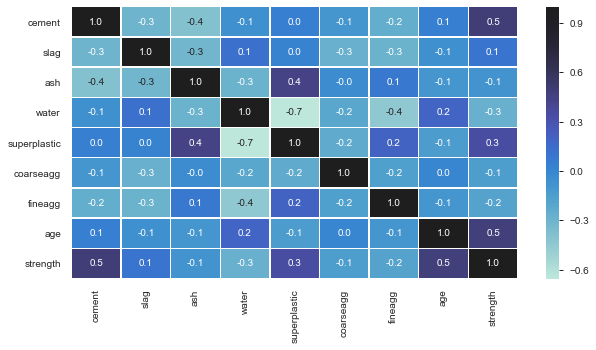

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

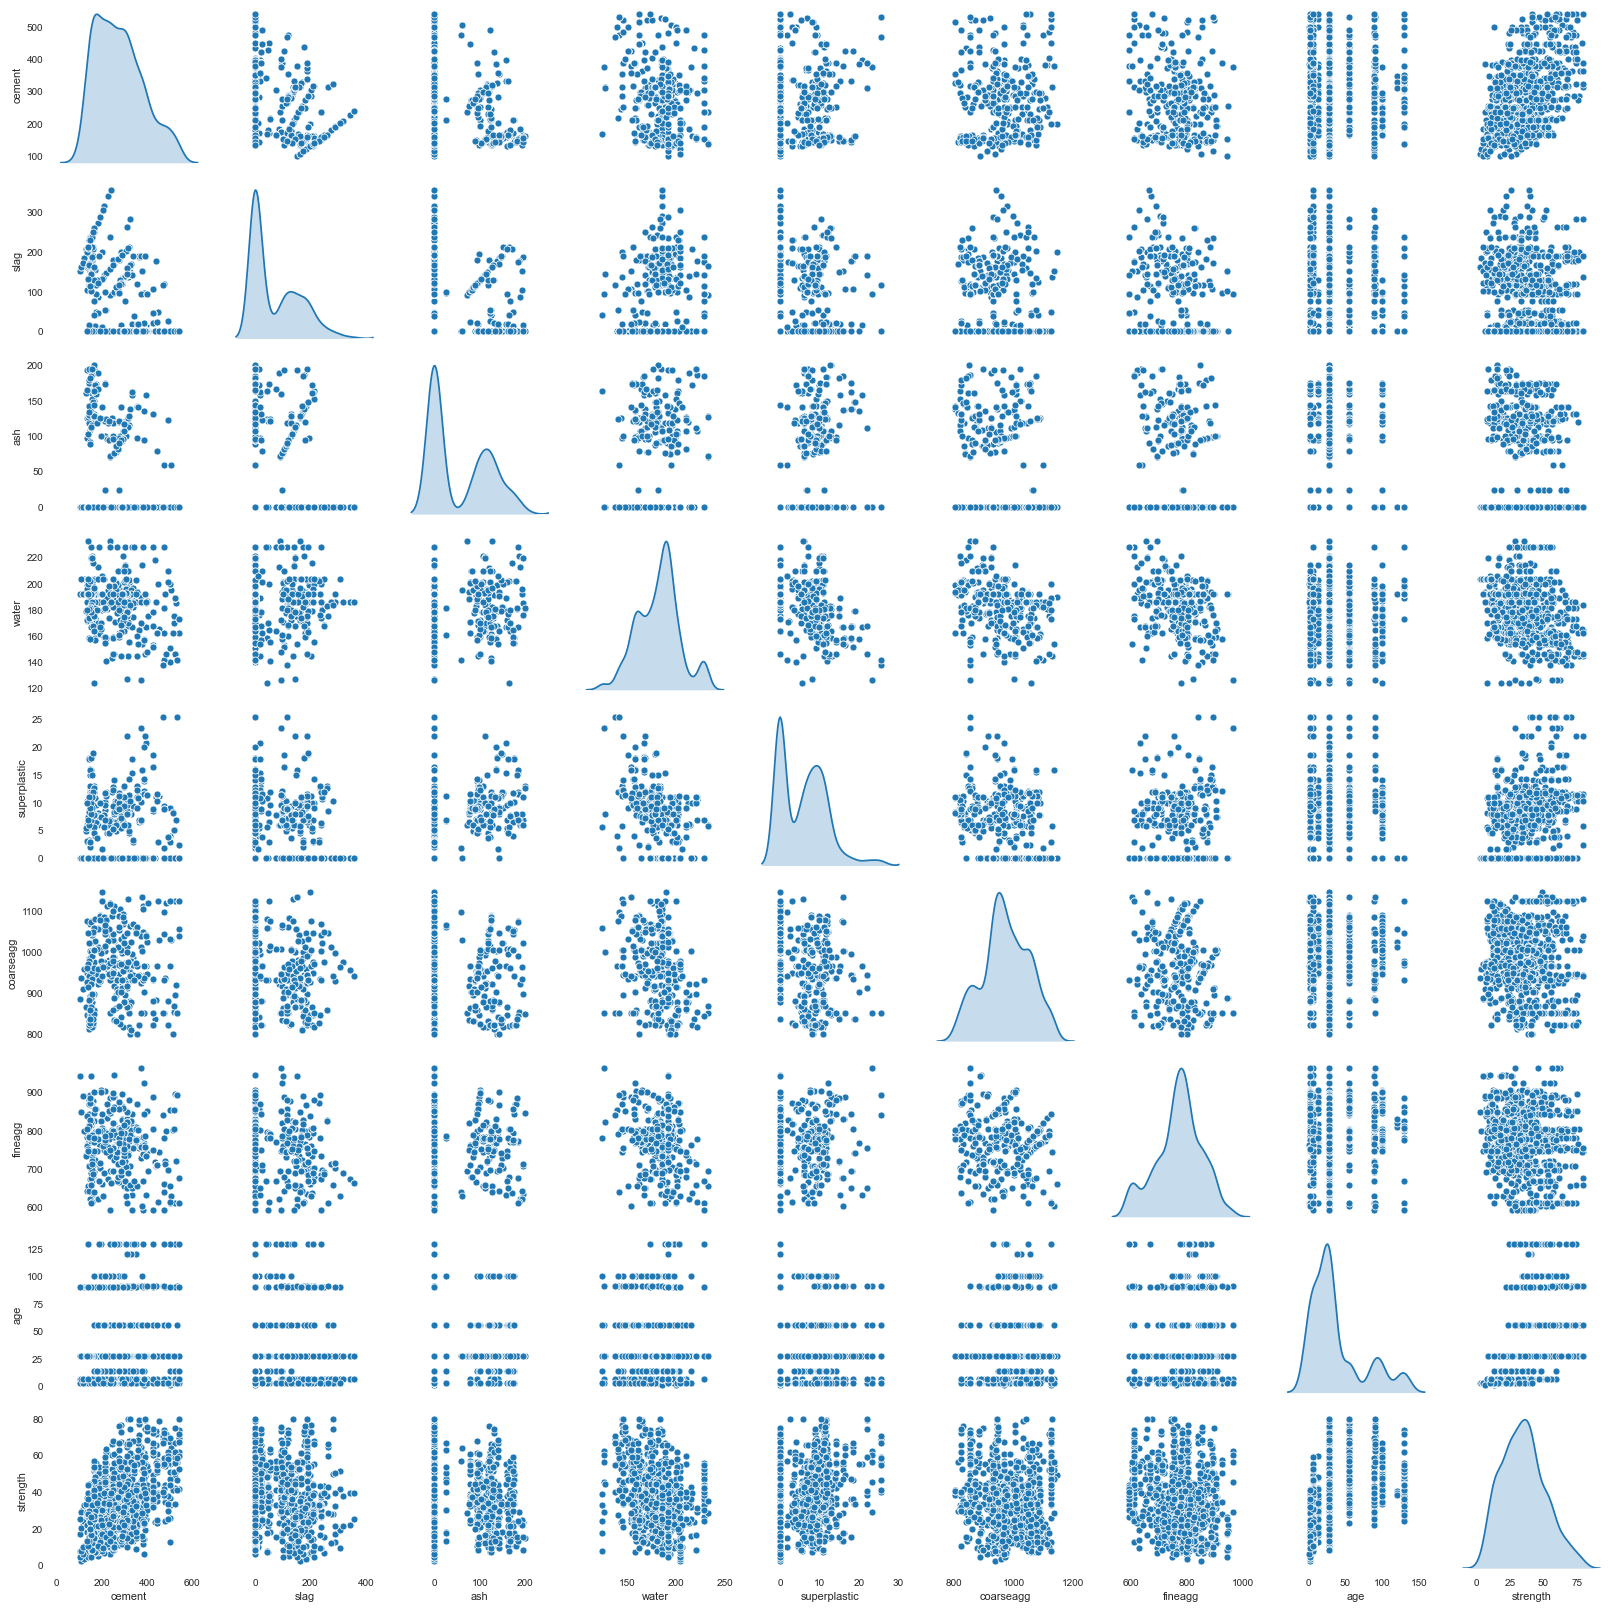

In [32]:
sns.pairplot(df, diag_kind='kde')   

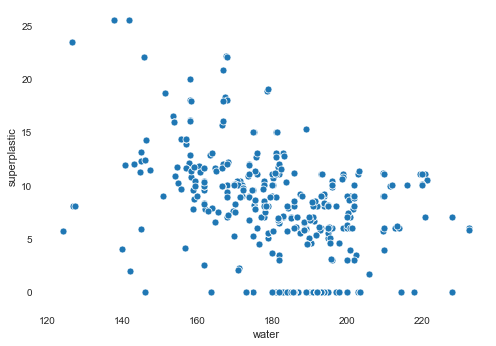

In [33]:
sns.scatterplot(df['water'], df['superplastic'])

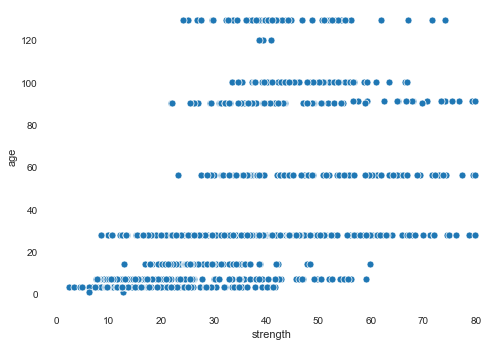

In [34]:
sns.scatterplot(df['strength'], df['age'])

### Remarks : Since we know superplasticizers allow reduction in water content by 30% or more. Hence as expected water requirement decreases with higher use of superplastics. Also strength increases with age of the concrete.

3. Feature Engineering techniques (10 marks)
a. Identify opportunities (if any) to extract a new feature from existing features,
drop a feature (if required)
b. Get data model ready and do a train test split.
c. Decide on complexity of the model, should it be simple linear model in terms
of parameters or would a quadratic or higher degree.

### Remarks: Since water cement ratio is a better predictor of strength we shall derive that and add as an additional feature in our data frame. Lower the water cement ratio better the strength of concrete. Water cement ratio is calculated by dividing water by cement quantity.

In [35]:
df['WaterCement Ratio'] = df['water']/df['cement']
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  WaterCement Ratio  
0     29.89           1.440198  
1     23.51           0.937241  
2     29.22           0.749600  
3     45.85           0.857143  
4     18.29           1.248708

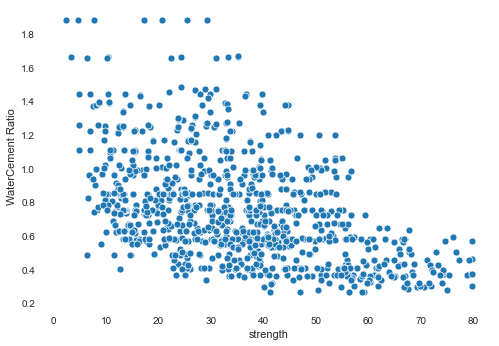

In [36]:
sns.scatterplot(df['strength'], df['WaterCement Ratio'])

### Remarks: Checking test accuracies of linear model after dropping attribute cement or water or both we conclude to drop water from our dataframe. This is done to maintain independence of attributes in our model.

In [37]:
df = df.drop(['water'], axis =1)

In [38]:
df.head()

cement   slag    ash  superplastic  coarseagg  fineagg   age  strength  \
0   141.3  212.0    0.0           0.0      971.8    748.5  28.0     29.89   
1   168.9   42.2  124.3          10.8     1080.8    796.2  14.0     23.51   
2   250.0    0.0   95.7           5.5      956.9    861.2  28.0     29.22   
3   266.0  114.0    0.0           0.0      932.0    670.0  28.0     45.85   
4   154.8  183.4    0.0           9.1     1047.4    696.7  28.0     18.29   

   WaterCement Ratio  
0           1.440198  
1           0.937241  
2           0.749600  
3           0.857143  
4           1.248708

In [39]:
# df2 = df.drop(['cement'], axis =1)
# df3 = df.drop(['cement','water'], axis =1)

Feature Selector

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [41]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()

In [42]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=6, forward=True, scoring='r2', cv=5)

In [43]:
# independant variables
x = df.drop('strength', axis=1)
# the dependent variable
y = df['strength']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [45]:
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [46]:
sfs1.get_metric_dict()

{1: {'feature_idx': (7,),
  'cv_scores': array([0.24718007, 0.21851038, 0.29667475, 0.26583616, 0.16254742]),
  'avg_score': 0.2381497592503984,
  'feature_names': ('7',),
  'ci_bound': 0.05854687494902853,
  'std_dev': 0.04555145774011249,
  'std_err': 0.022775728870056244},
 2: {'feature_idx': (6, 7),
  'cv_scores': array([0.45076707, 0.37824095, 0.54646971, 0.40688206, 0.47650884]),
  'avg_score': 0.4517737236420395,
  'feature_names': ('6', '7'),
  'ci_bound': 0.07495020395880504,
  'std_dev': 0.05831380498471797,
  'std_err': 0.02915690249235899},
 3: {'feature_idx': (1, 6, 7),
  'cv_scores': array([0.58471506, 0.57933235, 0.60050913, 0.54171433, 0.57732898]),
  'avg_score': 0.5767199688729707,
  'feature_names': ('1', '6', '7'),
  'ci_bound': 0.02480602186197864,
  'std_dev': 0.019299927750712098,
  'std_err': 0.009649963875356047},
 4: {'feature_idx': (1, 3, 6, 7),
  'cv_scores': array([0.65549903, 0.65918426, 0.66514092, 0.62736827, 0.67555907]),
  'avg_score': 0.65655031053239

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sequential Forward Selection (w. R^2)')

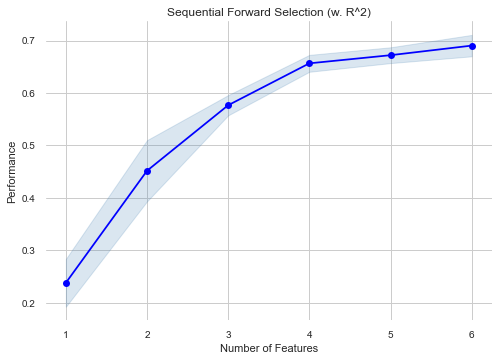

In [48]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [49]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 6, 7]


In [50]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'superplastic', 'age', 'WaterCement Ratio']


Build Linear model on selected features

In [51]:
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

LinearRegression()

In [52]:
y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.695


In [53]:
y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.700


Linear model on all features for comparison

In [54]:
linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression()

In [55]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on all features: %.3f' % linR.score(x_train, y_train))

Training accuracy on all features: 0.711


In [56]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on all features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on all features: 0.725


### Remarks : Since accuracy is higher for model with all features (72.5%) than with only selected 6 features (70.0%) we shall not drop any further features.

Data Model Ready

In [57]:
# independant variables
x = df.drop('strength', axis=1)
# the dependent variable
y = df['strength']

In [58]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model

LinearRegression()

Linear Regression Model

In [59]:
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model



LinearRegression()

In [60]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

The coefficient for cement is 0.10392490712066764
The coefficient for slag is 0.11816535658184972
The coefficient for ash is 0.09271094361147122
The coefficient for superplastic is 0.45179608228926366
The coefficient for coarseagg is 0.030983004149427784
The coefficient for fineagg is 0.03855013823231239
The coefficient for age is 0.24744674402631103
The coefficient for WaterCement Ratio is -9.584928268541757


In [61]:
intercept = lm.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -72.57047347333004


In [62]:
#Error Parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#make prediction
pred=lm.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print()
print("RMSE:",mean_squared_error(y_test,pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, pred))
print()
print("Training Score:", lm.score(x_train, y_train))
print()
print("Testing Score:", lm.score(x_test, y_test))

Mean Absolute Error: 6.538579843819951

RMSE: 8.444036483095976

R2 Squarred: 0.7251264835159874

Training Score: 0.7112900945245868

Testing Score: 0.7251264835159874


In [63]:
TrainAcc = lm.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = lm.score(x_test, y_test)
print("Testing accuracy",TestAcc)

Trainig accuracy 0.7112900945245868
Testing accuracy 0.7251264835159874


In [64]:
result = pd.DataFrame({'Model' : ['Linear Regression'], 'TrainAcc' : [TrainAcc], 'TestAcc' : [TestAcc]})
result

Model  TrainAcc   TestAcc
0  Linear Regression   0.71129  0.725126

In [65]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

lm= sm.OLS(y_train,X2).fit()

print("Pvalues for each column:")
print()
print(lm.pvalues)

Pvalues for each column:

const                 2.053457e-07
cement                1.987244e-22
slag                  2.070216e-46
ash                   1.391050e-18
superplastic          7.565378e-08
coarseagg             4.271762e-07
fineagg               1.092646e-08
age                  7.250482e-106
WaterCement Ratio     3.096767e-04
dtype: float64


In [66]:
#to see the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     213.7
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          1.54e-181
Time:                        22:53:59   Log-Likelihood:                -2524.1
No. Observations:                 703   AIC:                             5066.
Df Residuals:                     694   BIC:                             5107.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -72.5705     13.83

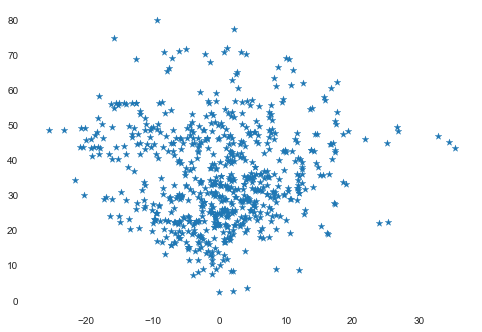

In [67]:
plt.scatter(lm.resid, lm.predict(),marker='*') # Plot between residual(actual - predicted) and predicted values
plt.show()

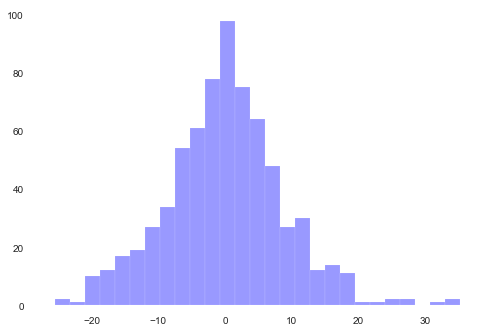

In [68]:
# error distribution
sns.distplot(lm.resid, hist=True, kde=False, color = 'blue')
plt.show()

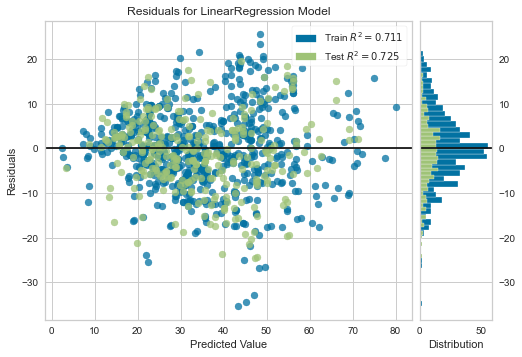

In [69]:
# library for visualizing result of the model.
from yellowbrick.regressor import ResidualsPlot

# Visualize errors of the model, Plot between residual(actual - predicted) and predicted values using ye
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

Ridge & Lasso Regression for Regularization

In [70]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [71]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3)

Ridge model: [ 0.10470866  0.11825182  0.09289835  0.45305136  0.03124047  0.03874489
  0.24749507 -9.33390492]


In [72]:
TrainAcc = ridge.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = ridge.score(x_test, y_test)
print("Testing accuracy",TestAcc)

result.loc[1] = ['Linear Regression_Ridge', TrainAcc, TestAcc]
result

Trainig accuracy 0.711286344319745
Testing accuracy 0.7252518764133454


Model  TrainAcc   TestAcc
0        Linear Regression  0.711290  0.725126
1  Linear Regression_Ridge  0.711286  0.725252

In [73]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.1)

Lasso model: [ 0.12348666  0.12040957  0.09759023  0.47857357  0.03734226  0.04346566
  0.2485287  -3.35220332]


In [74]:
TrainAcc = lasso.score(x_train,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = lasso.score(x_test, y_test)
print("Testing accuracy",TestAcc)

result.loc[2] = ['Linear Regression_Lasso', TrainAcc, TestAcc]
result

Trainig accuracy 0.708976529450686
Testing accuracy 0.7261531959245845


Model  TrainAcc   TestAcc
0        Linear Regression  0.711290  0.725126
1  Linear Regression_Ridge  0.711286  0.725252
2  Linear Regression_Lasso  0.708977  0.726153

Checking Polynomial Interaction Terms for Linear Model

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

lm_poly = linear_model.LinearRegression()

lm_poly.fit(x_train2, y_train)

y_pred = lm_poly.predict(x_test2)

print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(lm_poly.score(x_train2, y_train))

LinearRegression()

[33.66581923 10.2457658  22.3021439  39.76810839 22.22568622 13.96425899
 61.08299038 61.74219102 21.77725939 28.68910508 38.78935885 55.17659143
 48.35340785 27.43104016 17.64494751 42.21631157 59.0340455  35.73896873
 21.7545732  17.02090088 25.97809056 22.8841337  41.21781161 22.28825096
 32.33794039 26.86359387 45.38981655 47.31399188 33.63223136 30.77943026
 22.77908179 30.15593002 44.60894134 26.47054216 34.51731227 30.13387285
 21.86833578 42.40838011 33.48977738 31.02226354 22.63696838 34.8190898
 24.59697862 38.88361496  8.24409753 25.06561397 35.26698664 55.17659143
 48.47539485 38.22492733 50.7919714  19.04415802 43.72065212 40.48059434
 33.11851707 19.87422489 15.35120931 47.67703394 32.94200139 17.49864919
 50.7919714  22.64176026 25.65895804 37.91897939 34.74929047 39.37329389
 37.25838899 43.26620737 50.70216567 48.06901463 44.87024525 28.76563902
 58.10574154  9.24970563 33.26373589 45.60344616 20.194227   16.54146088
 15.10973959 43.96260337 44.72550606 23.19181853 13.

In [76]:
print(lm_poly.score(x_train2, y_train))
print(lm_poly.score(x_test2, y_test))

0.7918880168776639
0.7518900443810375


In [77]:
TrainAcc = lm_poly.score(x_train2,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = lm_poly.score(x_test2, y_test)
print("Testing accuracy",TestAcc)

result.loc[3] = ['LinearReg_poly', TrainAcc, TestAcc]
result

Trainig accuracy 0.7918880168776639
Testing accuracy 0.7518900443810375


Model  TrainAcc   TestAcc
0        Linear Regression  0.711290  0.725126
1  Linear Regression_Ridge  0.711286  0.725252
2  Linear Regression_Lasso  0.708977  0.726153
3           LinearReg_poly  0.791888  0.751890

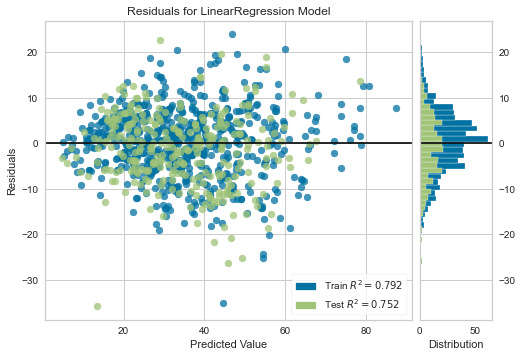

In [78]:
# library for visualizing result of your model. Install through jupyter terminal using: pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

# Visualize errors of the model, Plot between residual(actual - predicted) and predicted values using ye
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train2, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test2, y_test)  # Evaluate the model on the test data
visualizer.show();   

Lasso & Ridge Regression

In [79]:
ridge_poly = Ridge(alpha=.3)
ridge_poly.fit(x_train2,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.3)

Ridge model: [ 0.10470866  0.11825182  0.09289835  0.45305136  0.03124047  0.03874489
  0.24749507 -9.33390492]


In [80]:
TrainAcc = ridge_poly.score(x_train2,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = ridge_poly.score(x_test2, y_test)
print("Testing accuracy",TestAcc)

result.loc[4] = ['Linear Regression Poly_Ridge', TrainAcc, TestAcc]
result

Trainig accuracy 0.7911745908956338
Testing accuracy 0.7500147501852413


Model  TrainAcc   TestAcc
0             Linear Regression  0.711290  0.725126
1       Linear Regression_Ridge  0.711286  0.725252
2       Linear Regression_Lasso  0.708977  0.726153
3                LinearReg_poly  0.791888  0.751890
4  Linear Regression Poly_Ridge  0.791175  0.750015

In [81]:
lasso_poly = Lasso(alpha=0.3)
lasso_poly.fit(x_train2,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.3)

Lasso model: [ 0.12348666  0.12040957  0.09759023  0.47857357  0.03734226  0.04346566
  0.2485287  -3.35220332]


In [82]:
TrainAcc = lasso_poly.score(x_train2,y_train)
print("Trainig accuracy",TrainAcc)

TestAcc = lasso_poly.score(x_test2, y_test)
print("Testing accuracy",TestAcc)

result.loc[5] = ['Linear Regression Poly_Lasso', TrainAcc, TestAcc]
result

Trainig accuracy 0.7857928674515334
Testing accuracy 0.7551262910582268


Model  TrainAcc   TestAcc
0             Linear Regression  0.711290  0.725126
1       Linear Regression_Ridge  0.711286  0.725252
2       Linear Regression_Lasso  0.708977  0.726153
3                LinearReg_poly  0.791888  0.751890
4  Linear Regression Poly_Ridge  0.791175  0.750015
5  Linear Regression Poly_Lasso  0.785793  0.755126

In [83]:
print(x_train.shape)
print(x_train2.shape)

(703, 8)
(703, 37)


### Remarks: Lasso Regression with interaction terms from quadratic model gives highest Linear Model accuracy (75.5%). However it comes at a cost of (37-8) = 29 extra variables.

## Creating the model and tuning it
1. Algorithms that you think will be suitable for this project. Use Kfold Cross
Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Data Modelling Algorithms

Linear Regression

In [85]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = lasso_poly
results1 = cross_val_score(model, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.6034111 , 0.73826364, 0.8206078 , 0.68404029, 0.66830627,
       0.74045015, 0.73509748, 0.68116042, 0.6221294 , 0.65942445])

0.6952891005003115

0.06108209773287577

In [86]:
result_kfold = pd.DataFrame({'Model' : ['Linear Regression_Lasso Poly'], 'MeanAcc' : [mean], 'Std Dev' : [std]})
result_kfold

Model   MeanAcc   Std Dev
0  Linear Regression_Lasso Poly  0.695289  0.061082

Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor  

In [88]:
num_folds = 10
seed = 8

kfold = KFold(n_splits=num_folds, random_state=seed)
dTree = DecisionTreeRegressor()
results1 = cross_val_score(dTree, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.72532253, 0.84374139, 0.93997884, 0.82544679, 0.84816957,
       0.87336215, 0.86742589, 0.79307061, 0.83845465, 0.87426245])

0.8429234850066779

0.053476764461078886

In [89]:
result_kfold.loc[1] = ['Decision Tree Regressor', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0  Linear Regression_Lasso Poly  0.695289  0.061082
1       Decision Tree Regressor  0.842923  0.053477

Decision Tree Regulaization

In [90]:
num_folds = 10
seed = 9

kfold = KFold(n_splits=num_folds, random_state=seed)
dTreeR = DecisionTreeRegressor(max_depth = 6)
results1 = cross_val_score(dTreeR, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.70595623, 0.77910064, 0.85448003, 0.80461705, 0.81087778,
       0.8105374 , 0.85447489, 0.78293671, 0.78669816, 0.81150308])

0.8001181985986661

0.04008435697181821

In [91]:
result_kfold.loc[2] = ['Decision Tree Reg Regularization', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084

Bagging

In [92]:
from sklearn.ensemble import BaggingRegressor

In [93]:
num_folds = 10
seed = 10

kfold = KFold(n_splits=num_folds, random_state=seed)
bgcl = BaggingRegressor()
results1 = cross_val_score(bgcl, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.79417439, 0.89608587, 0.95418684, 0.9322501 , 0.86440137,
       0.91976787, 0.92434529, 0.88480083, 0.9271122 , 0.92597399])

0.9023098745197489

0.043621972529739726

In [94]:
result_kfold.loc[3] = ['Bagging', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622

Ada Boost Regressor

In [95]:
from sklearn.ensemble import AdaBoostRegressor

In [96]:
num_folds = 10
seed = 11

kfold = KFold(n_splits=num_folds, random_state=seed)
abcl = AdaBoostRegressor()
results1 = cross_val_score(abcl, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.75366609, 0.79508165, 0.8263718 , 0.74902552, 0.75863354,
       0.80974351, 0.78030635, 0.6982545 , 0.72912624, 0.77179119])

0.7672000385665741

0.03615446136984964

In [97]:
result_kfold.loc[4] = ['Ada Boost Regressor', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154

Gradient Boost Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
num_folds = 5
seed = 12

kfold = KFold(n_splits=num_folds, random_state=seed)
gbcl = GradientBoostingRegressor()
results1 = cross_val_score(gbcl, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.88360325, 0.92564089, 0.87715013, 0.91645101, 0.89207467])

0.898983990292912

0.01885051946787823

In [100]:
result_kfold.loc[5] = ['Grad Boost Regressor', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154
5              Grad Boost Regressor  0.898984  0.018851

Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
num_folds = 10
seed = 13

kfold = KFold(n_splits=num_folds, random_state=seed)
rfcl = RandomForestRegressor()
results1 = cross_val_score(rfcl, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.83445724, 0.90327759, 0.95042917, 0.92975712, 0.88204871,
       0.92492912, 0.93386212, 0.89838157, 0.91781784, 0.93299673])

0.9107957212649479

0.031731593289445685

In [103]:
result_kfold.loc[6] = ['Random Forest', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154
5              Grad Boost Regressor  0.898984  0.018851
6                     Random Forest  0.910796  0.031732

In [104]:
#Build RF Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,random_state=9999)
rfm=rf.fit(x_train, y_train)

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.YTick at 0x7fc5bfac8150>,
 [Text(0, 0, 'ash'),
  Text(0, 0, 'coarseagg'),
  Text(0, 0, 'fineagg'),
  Text(0, 0, 'cement'),
  Text(0, 0, 'superplastic'),
  Text(0, 0, 'slag'),
  Text(0, 0, 'age'),
  Text(0, 0, 'WaterCement Ratio')])

Text(0.5, 0, 'Relative Importance')

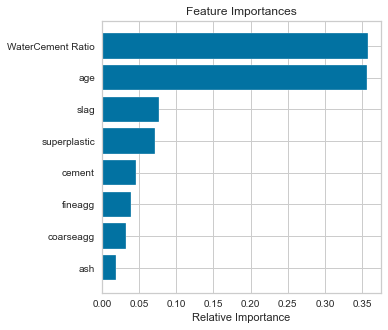

In [105]:
# View a list of the features and their importance scores
importances = rfm.feature_importances_
indices = np.argsort(importances)
a = df.columns[:]
features= a.drop('strength')
#plot it
plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Water Cement Ratio & Age are the best predictors for concrete strength.

### Random forest (91.0%), Bagging (90.2%) and Gradient Boooster (89.9%) gives the best performance for our models.

## Hyper Parameter Tuning

2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

DecisionTree Tuning

In [107]:
dTree_tuned = DecisionTreeRegressor()

In [108]:
dTree_tuned.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [109]:
# specify parameters and distributions to sample from
param_dist_dTree = {"criterion" : ['mse', 'friedman mse'],
              "max_depth": [None, 1],
              "max_features": ['auto','sqrt','log'],
              "min_samples_split": sp_randint(2, 5),
              "min_samples_leaf": sp_randint(1, 4),
             }

In [110]:
# run randomized search
samples = 10  # number of random samples 
randomCV_dTree = RandomizedSearchCV(dTree_tuned, param_distributions=param_dist_dTree, n_iter=samples, cv=10, random_state=30)

In [111]:
randomCV_dTree.fit(x, y)

print(randomCV_dTree.best_params_)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['mse', 'friedman mse'],
                                        'max_depth': [None, 1],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c341f910>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c341f590>},
                   random_state=30)

{'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [112]:
num_folds = 10
seed = 14

kfold = KFold(n_splits=num_folds, random_state=seed)
dTree = DecisionTreeRegressor(criterion = 'mse', max_depth = None, max_features = 'auto', min_samples_leaf= 1, min_samples_split= 4)
results1 = cross_val_score(dTree, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.73910489, 0.86773584, 0.93533942, 0.80606875, 0.87157535,
       0.86858675, 0.89110801, 0.81146714, 0.83432983, 0.90002497])

0.8525340957636031

0.053380245084169956

In [113]:
result_kfold.loc[7] = ['DecisionTree_Tuned', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154
5              Grad Boost Regressor  0.898984  0.018851
6                     Random Forest  0.910796  0.031732
7                DecisionTree_Tuned  0.852534  0.053380

Bagging 

In [114]:
bgcl_tuned = BaggingRegressor()

In [115]:
bgcl_tuned.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
param_dist_bgcl = {"base_estimator" : [dTree],
              "max_features": sp_randint(1, 6),
              "max_samples": sp_randint(1, 6),
              "n_estimators": [20]
             }

In [117]:
# run randomized search
samples = 10  # number of random samples 
randomCV_Bag = RandomizedSearchCV(bgcl_tuned, param_distributions=param_dist_bgcl, n_iter=samples, cv=10, random_state = 31)

In [118]:
randomCV_Bag.fit(x, y)

print(randomCV_Bag.best_params_)

RandomizedSearchCV(cv=10, estimator=BaggingRegressor(),
                   param_distributions={'base_estimator': [DecisionTreeRegressor(max_features='auto',
                                                                                 min_samples_split=4)],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c332f490>,
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c332f250>,
                                        'n_estimators': [20]},
                   random_state=31)

{'base_estimator': DecisionTreeRegressor(max_features='auto', min_samples_split=4), 'max_features': 5, 'max_samples': 5, 'n_estimators': 20}


In [119]:
num_folds = 10
seed = 15

kfold = KFold(n_splits=num_folds, random_state=seed)
bgcl = BaggingRegressor(base_estimator = DecisionTreeRegressor(max_features='auto', min_samples_split=4), max_features = 5, max_samples =5, n_estimators =20)
results1 = cross_val_score(bgcl_tuned, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.80916821, 0.88981429, 0.94093408, 0.92194256, 0.86933734,
       0.91302669, 0.93512917, 0.88142447, 0.90425795, 0.91405701])

0.8979091778009309

0.03656809227528751

In [120]:
result_kfold.loc[8] = ['BaggingRegressor_Tuned', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154
5              Grad Boost Regressor  0.898984  0.018851
6                     Random Forest  0.910796  0.031732
7                DecisionTree_Tuned  0.852534  0.053380
8            BaggingRegressor_Tuned  0.897909  0.036568

Gradient Booster

In [121]:
gbcl_tuned = GradientBoostingRegressor()

In [122]:
gbcl_tuned.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [123]:
param_dist_gbcl = {"loss" : ['ls', 'lad', 'huber', 'quantile'],
                   "max_depth" : sp_randint(3, 7),
                   "max_features": ['None, ''auto', 'sqrt', 'log2'],
                   "min_samples_split": sp_randint(2, 5),
                   "min_samples_leaf": sp_randint(1, 3)
                   }

In [124]:
#run randomized search

samples = 10  # number of random samples 
randomCV_Grad = RandomizedSearchCV(gbcl_tuned, param_distributions=param_dist_gbcl, n_iter=samples, cv=10, random_state=32)

In [125]:
randomCV_Grad.fit(x, y)

print(randomCV_Grad.best_params_)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                   param_distributions={'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c35cc190>,
                                        'max_features': ['None, auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c35cc410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c35cc210>},
                   random_state=32)

{'loss': 'ls', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3}


In [126]:
num_folds = 10
seed = 16

kfold = KFold(n_splits=num_folds, random_state=seed)
gbcl_tuned = GradientBoostingRegressor(loss= 'ls', max_depth= 6, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 3)
results1 = cross_val_score(gbcl_tuned, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.89236481, 0.91891983, 0.95406242, 0.95663691, 0.87171145,
       0.94233803, 0.93528836, 0.92614875, 0.92608563, 0.93999125])

0.9263547446517302

0.025303264754972712

In [127]:
result_kfold.loc[9] = ['GradientBoosting_Tuned', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0      Linear Regression_Lasso Poly  0.695289  0.061082
1           Decision Tree Regressor  0.842923  0.053477
2  Decision Tree Reg Regularization  0.800118  0.040084
3                           Bagging  0.902310  0.043622
4               Ada Boost Regressor  0.767200  0.036154
5              Grad Boost Regressor  0.898984  0.018851
6                     Random Forest  0.910796  0.031732
7                DecisionTree_Tuned  0.852534  0.053380
8            BaggingRegressor_Tuned  0.897909  0.036568
9            GradientBoosting_Tuned  0.926355  0.025303

Random Forest Regressor

In [128]:
rfcl_tuned = RandomForestRegressor()

In [129]:
rfcl_tuned.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
# specify parameters and distributions to sample from
param_dist_rbcl = {"max_depth": [None, 1,],
              "max_features": ['auto','sqrt','log'],
              "min_samples_split": sp_randint(2, 4),
              "min_samples_leaf": sp_randint(1, 4),
             }

In [131]:
# run randomized search
samples = 10  # number of random samples 
randomCV_ranforest = RandomizedSearchCV(rfcl_tuned, param_distributions=param_dist_rbcl, n_iter=samples, cv=10, random_state = 33)

In [132]:
randomCV_ranforest.fit(x, y)

print(randomCV_ranforest.best_params_)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 1],
                                        'max_features': ['auto', 'sqrt', 'log'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c36e94d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc5c36e9450>},
                   random_state=33)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [133]:
num_folds = 10
seed = 16

kfold = KFold(n_splits=num_folds, random_state=seed)

rfcl_tuned = RandomForestRegressor(max_depth = None ,max_features= 'auto', min_samples_leaf = 1, min_samples_split =2)
results1 = cross_val_score(rfcl_tuned, x, y, cv=kfold)
results1

mean = results1.mean()
mean

std = results1.std()
std

array([0.83906405, 0.89914714, 0.94934842, 0.93743733, 0.8800498 ,
       0.92105158, 0.93537587, 0.90017237, 0.91559333, 0.933045  ])

0.911028489628648

0.031244593971952197

In [134]:
result_kfold.loc[10] = ['RandomForest_Tuned', mean, std]
result_kfold

Model   MeanAcc   Std Dev
0       Linear Regression_Lasso Poly  0.695289  0.061082
1            Decision Tree Regressor  0.842923  0.053477
2   Decision Tree Reg Regularization  0.800118  0.040084
3                            Bagging  0.902310  0.043622
4                Ada Boost Regressor  0.767200  0.036154
5               Grad Boost Regressor  0.898984  0.018851
6                      Random Forest  0.910796  0.031732
7                 DecisionTree_Tuned  0.852534  0.053380
8             BaggingRegressor_Tuned  0.897909  0.036568
9             GradientBoosting_Tuned  0.926355  0.025303
10                RandomForest_Tuned  0.911028  0.031245

### Conclusion: With tuning of Hyperparameters we have achieved an accuracy of 92.6% for Gradient Boosting model (from earlier 89.9%) and a standard deviation of 2.5%. Hence at a 95% confidence level we can achieve an accuracy between 87.7% and 97.5%.

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-astha1992